# <p style="text-align: center;">WRE Assignment </p>
<p style="text-align: center;">Mageline Duquesne, Marie Domingues Dos Santos, Romain Phan </p>

Notes: All our function are on Git4.py

In [74]:
#import Git4
import math
%run Git4.py
#Put nice graph
import seaborn as sns
sns.set_theme(style="whitegrid")

## <p style="color:red">Calibration </p>


 1. Report the best fit parameters for the hydrological model.

In [2]:
# Pest Parameters
# Valeur empirique trouvée par itération de l'algo

K_sat=3.5/(3600*1000) #mm/h -->m/s
c=8              # [-] exponent of ksat for the equation k = ksat * s^c
t_sub=70        # [h] mean sub-superficial residence time
z=600 #mm


 4. Plot Markov chains of the calibrated parameters and sequences of values of N S and TSA as a function of the number of iterations. Only plot accepted parameter sets.

## <p style="color:red">Hydrological variables </p>

Text(0, 0.5, 'Precipitation [mm/h]')

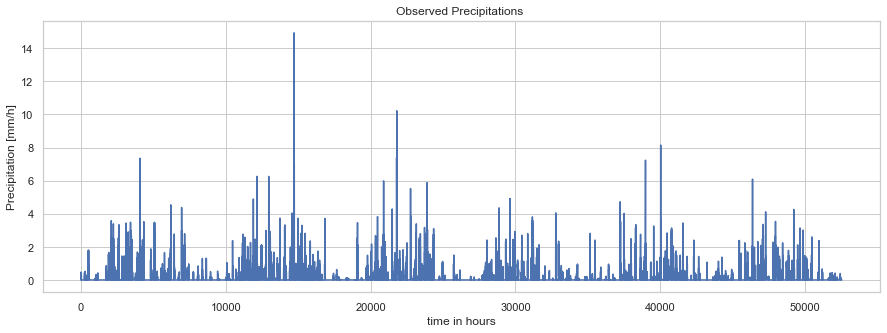

In [5]:
figure=plt.figure(figsize=(15,5))
plt.plot(precipitation)
plt.title("Observed Precipitations ")
plt.xlabel("time in hours")
plt.ylabel("Precipitation [mm/h]")

In [6]:
# modelisation of the hydrological variable with observed precipitations
[Q, R, I, s, L, ET]=hydr_model(K_sat, c, t_sub, z, precipitation, K_c, n_years=6, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)

 2. Plot the time series (6-year-long) of precipitation in [mm/h], run off in [mm/h], infiltration in [mm/h], soil moisture, leakage in [mm/h] and evapotranspiration in [mm/h] for the calibrated hydrological model forced by the given precipitation).

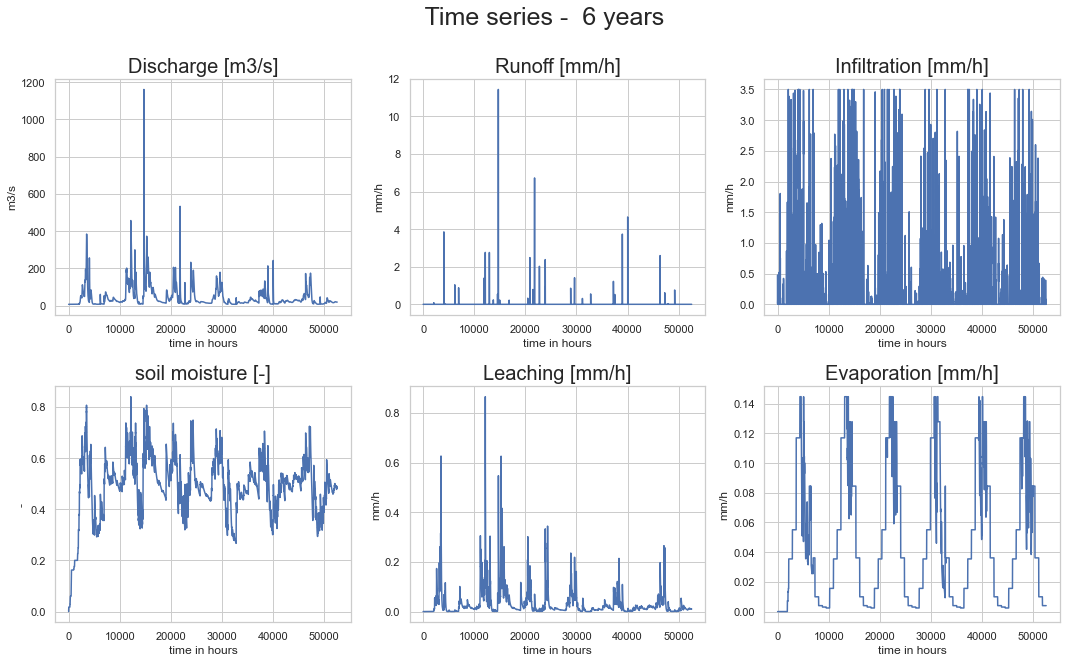

In [15]:
plot_model(Q, R, I, s, L, ET)

**Comments :** We observe that the simulated discharge , runoff and leaching present the sae pics as the observed precipitations plotted above, that is coherent. For the infiltration and the soil moisture, it is more difficult to identify pics. We observe that Evaporation is quite periodic. That is coherent as the evaporation depend on the potential evaporation that is yearly-periodic. 

## <p style="color:red"> Discharge </p>


3. Plot the time series of observed discharge and of the discharge as simulated by the
hydrological model with the best fit parameters.

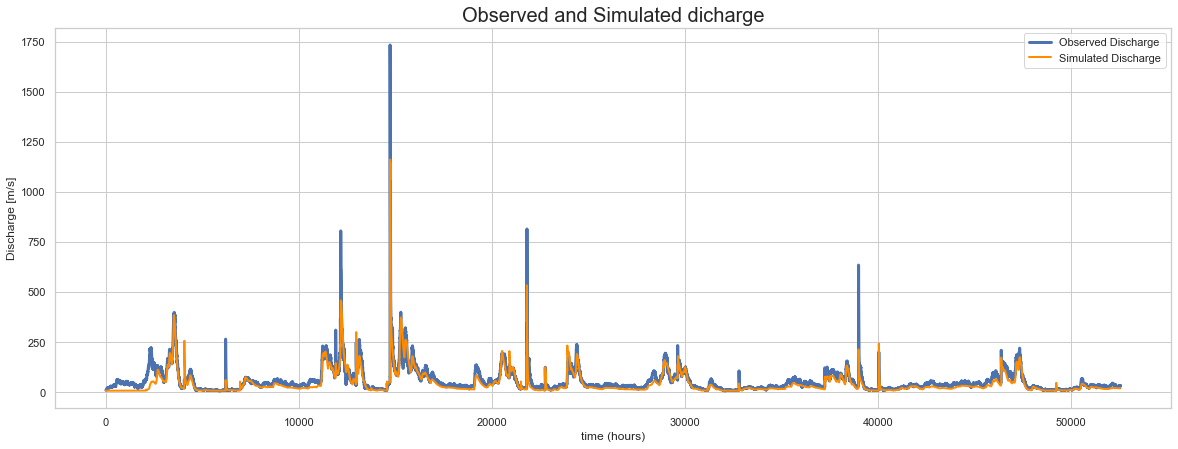

In [16]:
figure=plt.figure(figsize=(20,7))
plt.grid(True)
plt.plot(Q_obs,label="Observed Discharge", linewidth=3 )
plt.plot(Q, label="Simulated Discharge",color="darkorange", linewidth=2)

plt.xlabel("time (hours)")
plt.ylabel("Discharge [m/s]")
plt.title("Observed and Simulated dicharge",fontsize=20)
plt.legend()

**Comments:** We observe that simulated and observed Discharge are quite similar, the two curves overllap well during the the six years. However, pics of the Observed discharge are higher than simulated ones. That is a problem of the modelisation that tend to smooth processes

## <p style="color:red"> Generation of precipitation </p>

5. Plot the comparison between the statistics (mean, standard deviation, α and λ) of
the observed and generated precipitation

In [17]:
day_month=[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31] #"day_month": number of days for each month
month_end=np.cumsum(day_month)-1                    #"month_end": last day of each month
month_start=month_end-day_month+1

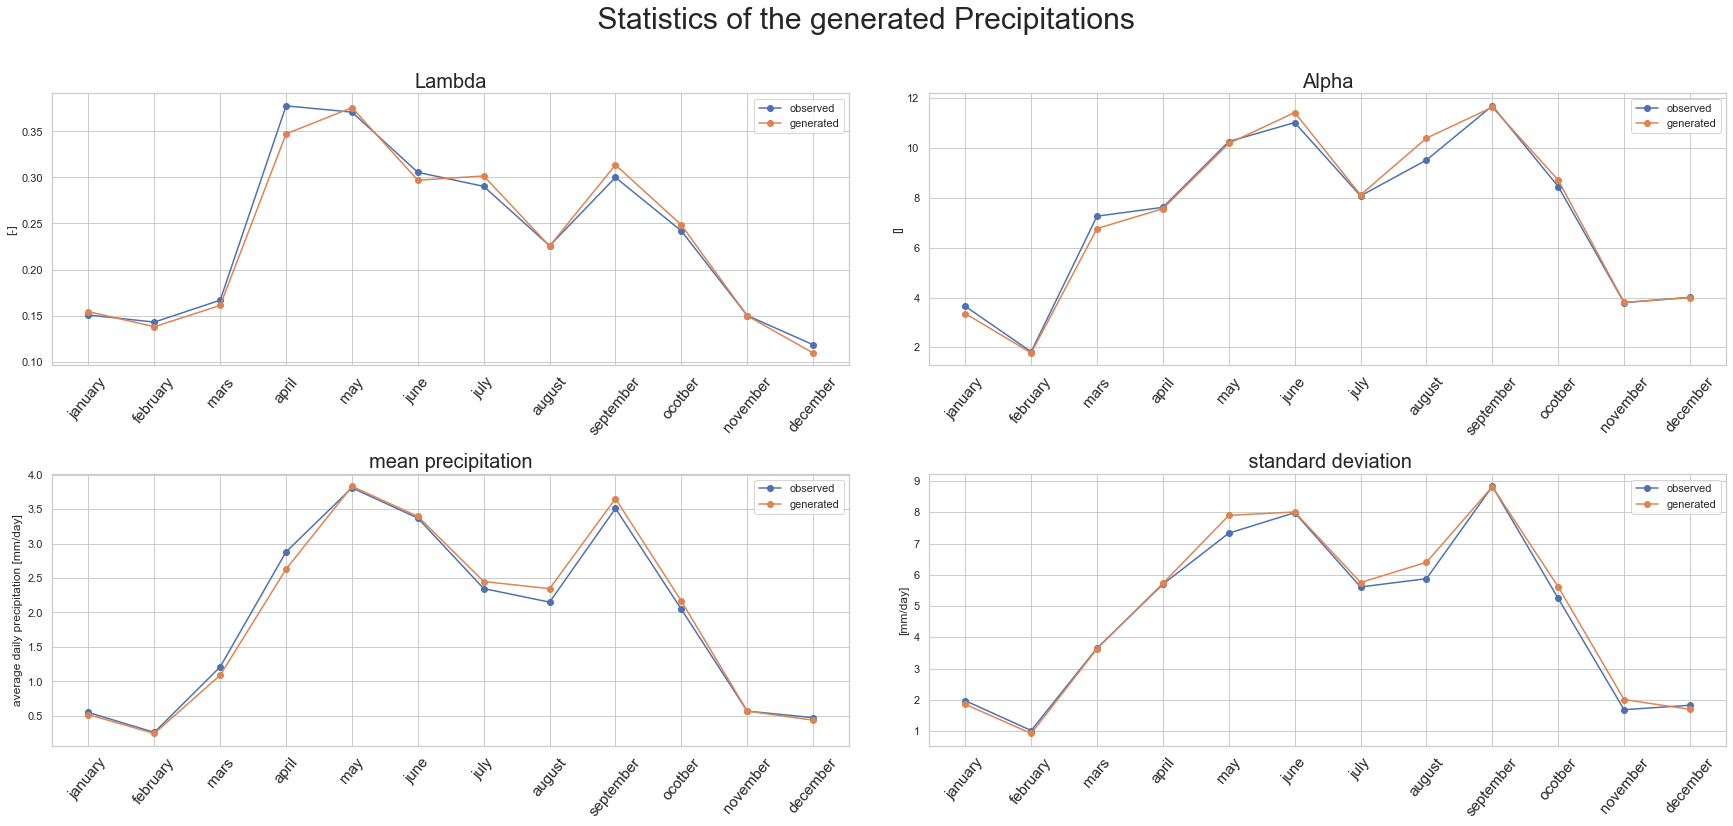

In [24]:
P=rain_gen(years=100,plot=True)

We observe a good overlapping of the different parameters.
# CHECK UNITS

## <p style="color:red"> Simulation of hydrological variables </p>

6. Plot the time series (100-year-long) of generated precipitation in [mm/h], run off in
[mm/h], infiltration in [mm/h], soil moisture, leakage in [mm/h] and evapotran-
spiration in [mm/h] for the calibrated hydrological model forced by the generated
precipitation)

In [25]:
[Q, R, I, s, L, ET]=hydr_model(K_sat, c, t_sub, z, P, K_c, n_years=100, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)


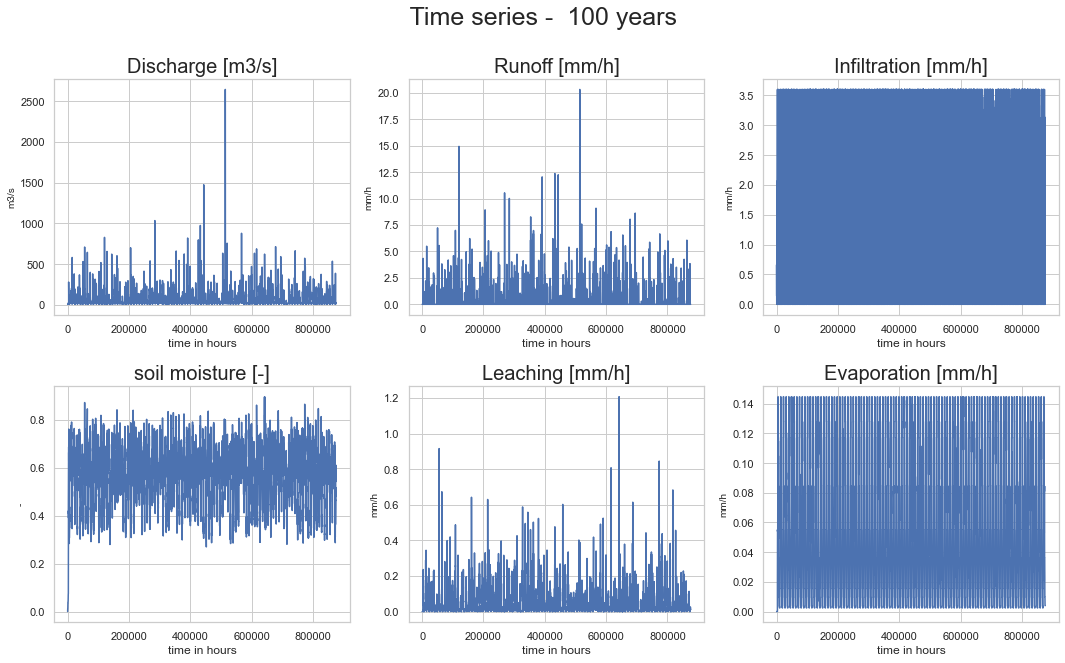

In [26]:
plot_model(Q, R, I, s, L, ET)

## <p style="color:red"> Reservoir Area and Volume Rating curves </p>

7. Plot the area and the volume rating curves for the given levels.

Text(0.5, 1.0, 'Area Rating curve')

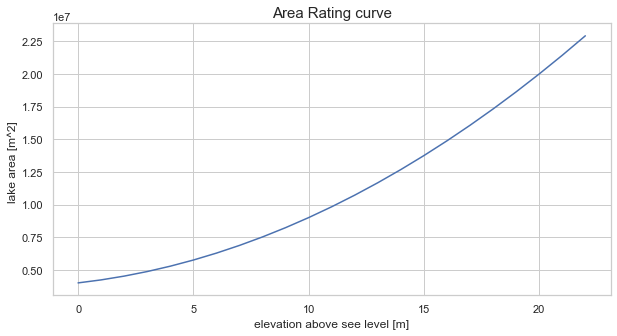

In [36]:
elevation=[k for k in range (0,23)]
figure=plt.figure(figsize=(10,5))
plt.plot(elevation,A_rating)
plt.xlabel("elevation above see level [m]")
plt.ylabel("lake area [m^2] ")
plt.title("Area Rating curve",fontsize=15)

Text(0.5, 1.0, 'Volume Rating curve')

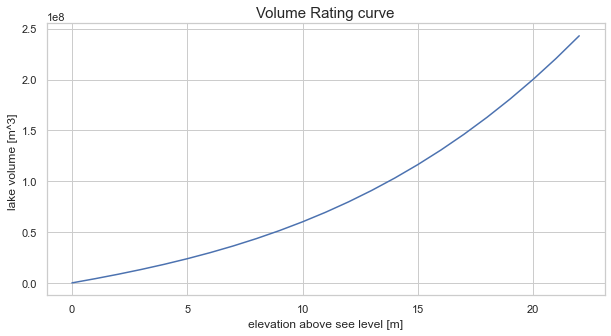

In [37]:
V_rating=vol_rat_curve(A_rating)
figure=plt.figure(figsize=(10,5))
plt.plot(elevation,V_rating)
plt.xlabel("elevation above see level [m]")
plt.ylabel("lake volume [m^3] ")
plt.title("Volume Rating curve",fontsize=15)

##  <p style="color:red"> Discharge and reservoir routine </p>

8. Report the minimum flow (discharge that is equalled or exceeded 95% of the time)
of the generated discharge and plot the discharge duration curves

Q347= 7.5279349536323314 m3/s


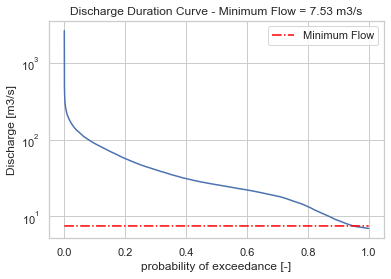

In [75]:
print("Q347= " +str(Q_347(Q, plot=True))+" m3/s") # m3/s

9. For a maximum level for hydroelectric use of 15 m, plot the time series (100 years
long) of input discharge, output discharge, volume within the reservoir and level

In [76]:
P=rain_gen(years=6,plot=False)
#Energy_price=75
[Q, R, I, s, L, ET]=hydr_model(K_sat, c, t_sub, z, P, K_c, n_years=6, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)
[V,l,A_sluice,Q_out,Q_HU,Q_g,Pow,profit,p_flood,E_annual,Damages]=reservoir_routine(Q,P,ET,V_rating,lmax_HU=15)

In [77]:
print("The Annual Energy Production is = "+ str(E_annual) + " GWh")

The Annual Energy Production is = 78.2434061732 GWh


**Comments :** This corresponds well to the order of magnitude of the annual production of a barage. The Swiss Federal Council website indicates that "677 power plants [...] produce an average of 36'741 gigawatt-hours (GWh/a) of electricity annually." That's an average of 54 GWh per dam, so our dam is above the Swiss average but in the same order in magnitude. Of course, our model is simplified, that can explain why the energy is above the swiss average.

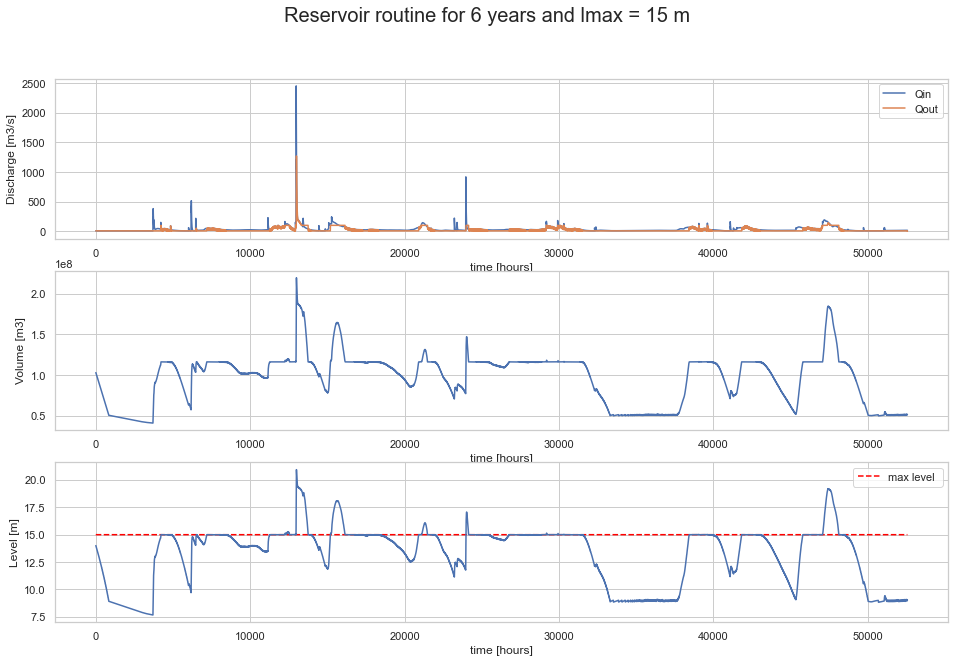

In [86]:
plot_routine(Q,Q_out,V,l,15)

**Comments :** 

10. Plot the average annual energy production in [GWh] and the probability that Qout
exceeds Qlim for different values of the maximum level for hydroelectrical use.

In [87]:
lmax=np.linspace(9,19,21)
energy=[]
money=[]
prob_flood=[]
for element in lmax:
    [V,l,A_sluice,Q_out,Q_HU,Q_g,Pow,profit,p_flood,E_annual,Damages]=reservoir_routine(Q,P,ET,V_rating,lmax_HU=element)
    energy.append(E_annual)
    money.append(profit)
    prob_flood.append(p_flood)
    
max_money=money[0]
best_l=lmax[0]
for i in range (1,len(lmax)):
    if money[i]>max_money:
                max_money=money[i]
                best_l=lmax[i]

Text(0.5, 1.0, 'Average annual energy production')

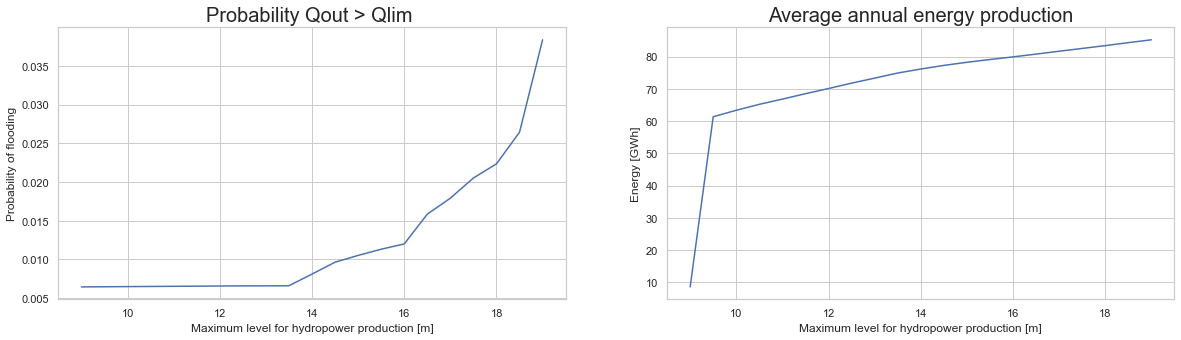

In [88]:
#plt.plot(lmax,money)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(lmax,prob_flood)
ax=plt.gca()
plt.xlabel("Maximum level for hydropower production [m]")
plt.ylabel("Probability of flooding")
ax.set_title("Probability Qout > Qlim ",fontsize=20)

plt.subplot(1,2,2)
plt.plot(lmax,energy)
ax=plt.gca()
plt.xlabel("Maximum level for hydropower production [m]")
plt.ylabel("Energy [GWh]")
ax.set_title("Average annual energy production",fontsize=20)

The best level for hydropower production is  13.5 m


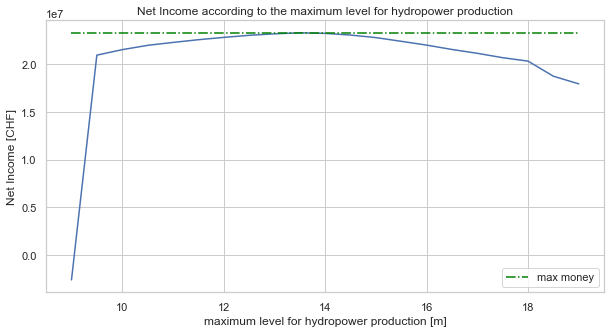

In [129]:
figure=plt.figure(figsize=(10,5))
plt.plot(lmax,money)
plt.plot(lmax,[max_money]*len(lmax),linestyle="-.", color="green",label="max money")
plt.xlabel("maximum level for hydropower production [m]")
plt.ylabel("Net Income [CHF]")
plt.title("Net Income according to the maximum level for hydropower production")
plt.legend()

print("The best level for hydropower production is  " + str(best_l) +" m")

   # REDO And check

**Comments**

##  <p style="color:red">  Multi-Criteria optimization </p>

##  <p style="color:red">  Climate change </p>

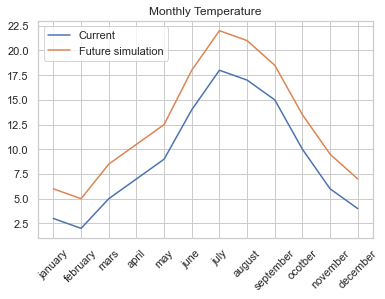

In [91]:
plt.plot(month_name,T_m,label="Current")
plt.plot(month_name,T_future,label="Future simulation")
plt.xticks(rotation=45)
plt.title("Monthly Temperature")
plt.legend()


15. Plot the comparison of the monthly statistics of rainfall and the mean monthly dis-
charge in [m3/s] computed under the current conditions and climate change conditions.

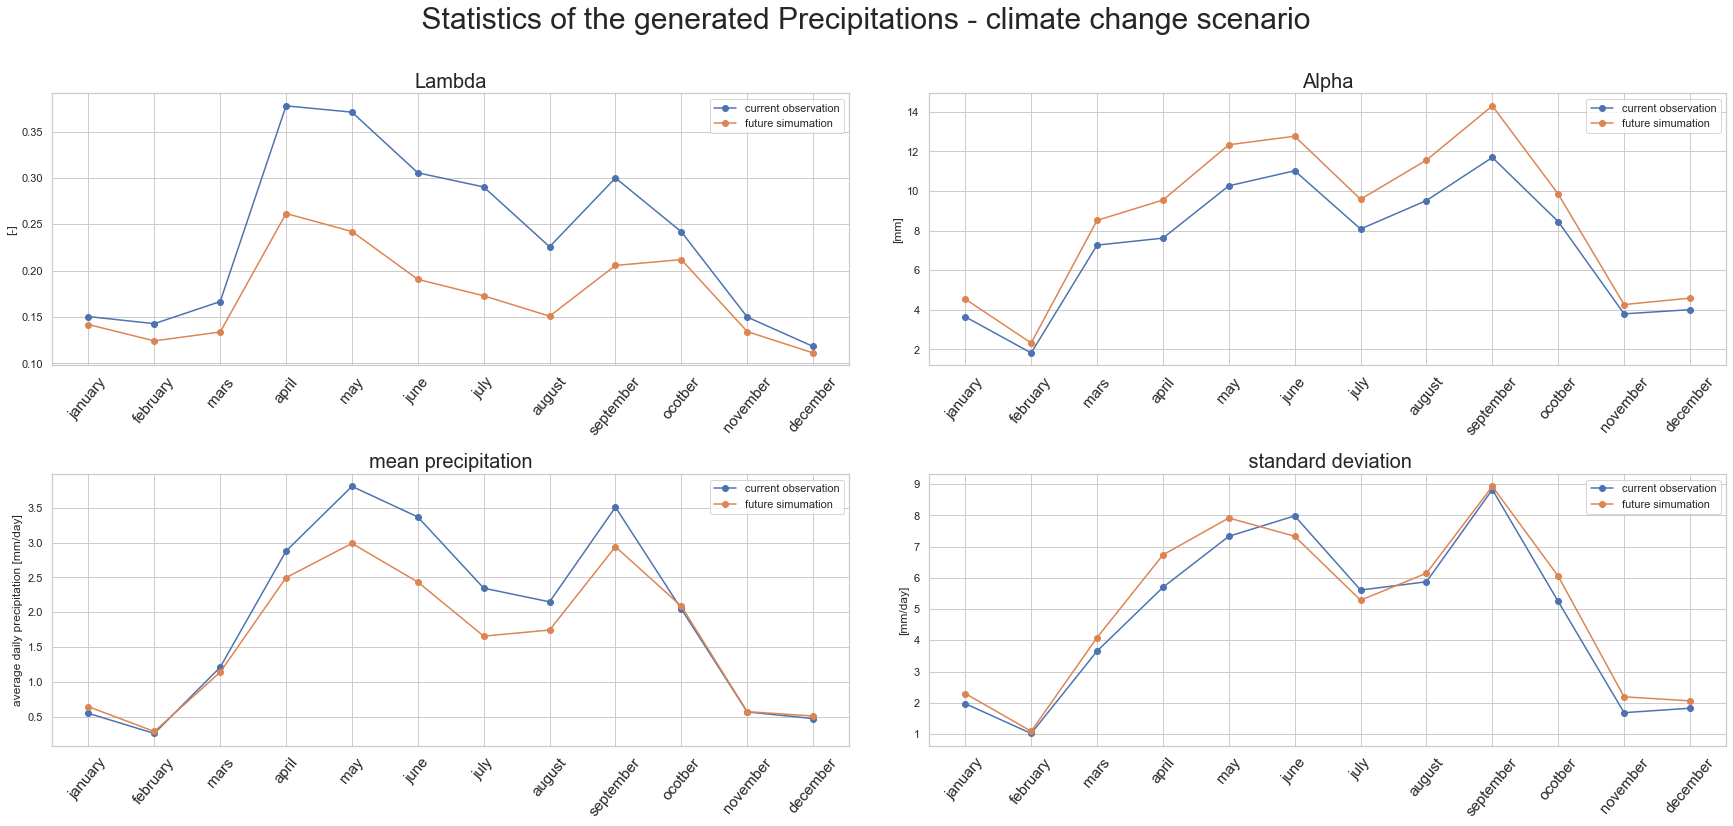

In [92]:
precipitation_change=rain_gen(years=100,plot=True,climate_change=True,alpha_c=alpha_c)


**Comments :** We observe that the monthly precipitation is lower in a climate change scenario, especially for months between April and September. The monthly standard deviation is slightly higher in the climate change scenario. Precipitation are less frequent but have an stronger intensity. It can have different consequences on the 

In [99]:
# Climate change variables
[Q_f, R_f, I_f, s_f, L_f, ET_f]=hydr_model(K_sat, c, t_sub, z, precipitation_change, K_c, n_years=100, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0, T=T_future)
# Present variables for comparison
[Q, R, I, s, L, ET]=hydr_model(K_sat, c, t_sub, z, P, K_c, n_years=6, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)

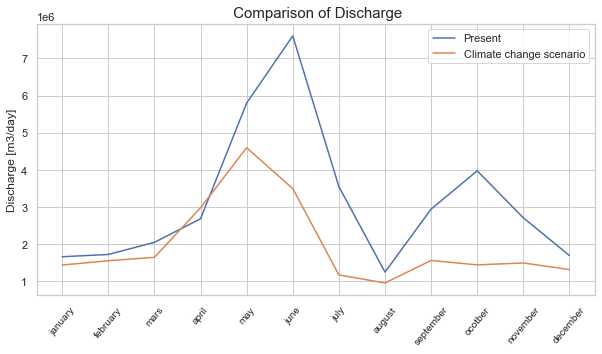

In [119]:
mQ=np.asarray(monthly_mean(Q))*3600
mQf=np.asarray(monthly_mean(Q_f))*3600
plt.figure(figsize=(10,5))
plt.plot(month_name,mQ,label="Present")
plt.plot(month_name,mQf,label="Climate change scenario")
plt.xticks(rotation=50,fontsize=10)
plt.ylabel("Discharge [m3/day]")
plt.title(" Comparison of Discharge",fontsize=15)
plt.legend()

**Comments:** We observe a strong reduction of the discharge for every month. The gap is especially high in june and october. It risks to reduce the energy production!

# Check Units 

16. Plot the comparison between the energy production and flooding probability under
current and climate change conditions.

In [130]:
[V_f,l_f,A_sluice_f,Q_out_f,Q_HU_f,Q_g_f,Pow,profit_f,p_flood_f,E_annual_f,Damages_f]=reservoir_routine(Q_f,precipitation_change,ET_f,V_rating,lmax_HU=13.5)

In [123]:
lmax=np.linspace(9,19,21)
energy_f=[]
money_f=[]
prob_flood_f=[]
for element in lmax:
    [V_f,l_f,A_sluice_f,Q_out_f,Q_HU_f,Q_g_f,Pow,profit_f,p_flood_f,E_annual_f,Damages_f]=reservoir_routine(Q_f,precipitation_change,ET_f,V_rating,lmax_HU=element)
    energy_f.append(E_annual)
    money_f.append(profit)
    prob_flood_f.append(p_flood)
    
max_money_f=money_f[0]
best_l_f=lmax[0]
for i in range (1,len(lmax)):
    if money_f[i]>max_money_f:
                max_money_f=money_f[i]
                best_l_f=lmax[i]

Text(0.5, 1.0, 'Average annual energy production')

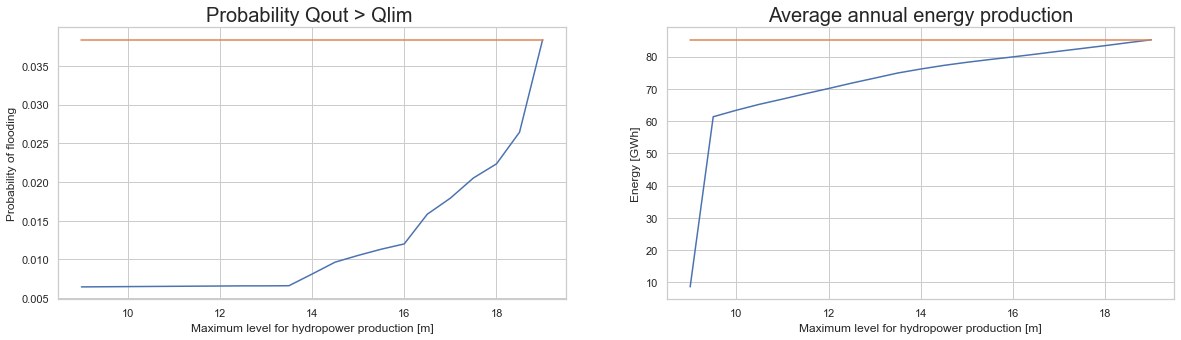

In [124]:
#plt.plot(lmax,money)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(lmax,prob_flood,label="Present")
plt.plot(lmax,prob_flood_f,label="Climate change scenario")
ax=plt.gca()
plt.xlabel("Maximum level for hydropower production [m]")
plt.ylabel("Probability of flooding")
ax.set_title("Probability Qout > Qlim ",fontsize=20)

plt.subplot(1,2,2)
plt.plot(lmax,energy,label="Present")
plt.plot(lmax,energy_f,label="Climate change scenario")
ax=plt.gca()
plt.xlabel("Maximum level for hydropower production [m]")
plt.ylabel("Energy [GWh]")
ax.set_title("Average annual energy production",fontsize=20)
plt.legend()

17. Plot the comparison between the income function for different levels under current
and climate change conditions.


In [ ]:
figure=plt.figure(figsize=(10,5))
plt.plot(lmax,money)
plt.xlabel("maximum level for hydropower production [m]")
plt.ylabel("Net Income [CHF]")
plt.title("Net Income according to the maximum level for hydropower production")


18. Elaborate on the impact of climate change on the operation of the reservoir

# LE CHANGEMENT CLIMATIQUE C'EST PAS BIEN